In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


### getting access token

In [ ]:
curl -X POST "https://accounts.spotify.com/api/token" \
     -H "Content-Type: application/x-www-form-urlencoded" \
     -d "grant_type=client_credentials&client_id=cf96d9a100a84786a69e4dbd1830203f&client_secret=eec6141531b34680b7f20533a0e92974"

In [13]:
client_id = 'cf96d9a100a84786a69e4dbd1830203f'
client_secret = 'de2d3cabea5e43fca3b40fbf2bf53fe9'

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [63]:
from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth
import os

from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth
import os

# Step 1: Fill in your actual app credentials
CLIENT_ID = 'cf96d9a100a84786a69e4dbd1830203f'
CLIENT_SECRET = 'de2d3cabea5e43fca3b40fbf2bf53fe9'


sp = Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri="http://127.0.0.1:8888/callback",
    scope="user-read-private"  # minimal scope for login test
))

user = sp.current_user()
print("✅ Logged in as:", user["display_name"])


✅ Logged in as: sayaka8828


In [64]:
print("Token:", sp.auth_manager.get_access_token(as_dict=False))

Token: BQAPEUff2hp_ONvlPHU8_1O1s_4qXdU_ZCqztrvtPpRfCF887yDcX7QKHlxVdM5PKmBTSXwq_eOiwhMXzGatomHROVXTuKPlQbtWo4FfhKgoSijcWG_lWCej4Szx-SN98uz2WAFIFOMM_iPWSt9m4Nndf5lY5mo5DaZFATyPeEF7w7PGGjrd9cjq2ARQk9h9qZqRgRLdz9r3A00cIKZbkQsgkN7oYhijAhxuNH_XJgdxAdGRIg


In [16]:
sp.track('6m1TWFMeon7ai9XLOzdbiR')#BTS id= '3Nrfpe0tUJi4K4DXYWgMUX'
sp.track('3CYH422oy1cZNoo0GTG1TK')#Red Velvet '1z4g3DjTBBZKhvAroFlhOM'
sp.track('5H1sKFMzDeMtXwND3V6hRY')#Black Pink '41MozSoPIsD1dJM0CLPjZF'
sp.track('3zhbXKFjUDw40pTYyCgt1Y')# Twice '7n2Ycct7Beij7Dj7meI4X0'
sp.track('6I2tqFhk8tq69iursYxuxd')#Seventeen '7nqOGRxlXj7N2JYbgNEjYH'
sp.track('5BXr7hYZQOeRttkeWYTq5S')#Stayc '01XYiBYaoMJcNhPokrg0l0'
sp.artist('1z4g3DjTBBZKhvAroFlhOM')

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1z4g3DjTBBZKhvAroFlhOM'},
 'followers': {'href': None, 'total': 9570431},
 'genres': ['k-pop'],
 'href': 'https://api.spotify.com/v1/artists/1z4g3DjTBBZKhvAroFlhOM',
 'id': '1z4g3DjTBBZKhvAroFlhOM',
 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb02a562ea6b1dc718394010ac',
   'height': 640,
   'width': 640},
  {'url': 'https://i.scdn.co/image/ab6761610000517402a562ea6b1dc718394010ac',
   'height': 320,
   'width': 320},
  {'url': 'https://i.scdn.co/image/ab6761610000f17802a562ea6b1dc718394010ac',
   'height': 160,
   'width': 160}],
 'name': 'Red Velvet',
 'popularity': 71,
 'type': 'artist',
 'uri': 'spotify:artist:1z4g3DjTBBZKhvAroFlhOM'}

In [17]:
h=sp.artist_top_tracks('1z4g3DjTBBZKhvAroFlhOM')
track_data=[]
for item in h['tracks']:
    track=item
    if track:
        track_data.append({
            'track_name': track['name'],
            'artist': track['artists'][0]['name'],
            'duration_ms':track['duration_ms'],
            'album':track['album']['name'],
            'release_date': track['album']['release_date'],
            'popularity': track['popularity']
            })
df = pd.DataFrame(track_data)
df


,track_name,artist,duration_ms,album,release_date,popularity
0,Psycho,Red Velvet,210560,‘The ReVe Festival’ Finale,2019-12-23,72
1,러시안 룰렛 Russian Roulette,Red Velvet,211243,Russian Roulette - The 3rd Mini Album,2016-09-07,71
2,Cosmic,Red Velvet,225864,Cosmic,2024-08-01,67
3,Bad Boy,Red Velvet,210817,The Perfect Red Velvet - The 2nd Album Repackage,2018-01-29,70
4,Red Flavor,Red Velvet,191139,The Red Summer - Summer Mini Album,2017-07-09,68
5,Feel My Rhythm,Red Velvet,210253,‘The ReVe Festival 2022 - Feel My Rhythm’,2022-03-21,66
6,Peek-A-Boo,Red Velvet,189049,Perfect Velvet - The 2nd Album,2017-11-17,65
7,Day 1,Red Velvet,206357,The Red - The 1st Album,2015-09-09,64
8,Queendom,Red Velvet,181760,Queendom - The 6th Mini Album,2021-08-16,62
9,In My Dreams,Red Velvet,204760,‘The ReVe Festival 2022 - Feel My Rhythm’,2022-03-21,61


In [110]:
#red_velvet=sp.artist('1z4g3DjTBBZKhvAroFlhOM')
#sp.artist_top_tracks('1z4g3DjTBBZKhvAroFlhOM')
artist_names = [
    "BTS", "BLACKPINK", "TWICE", "SEVENTEEN", "Stray Kids", "NCT 127", "NCT DREAM", "ENHYPEN", "TXT", "NewJeans",
    "IVE", "ITZY", "(G)I-DLE", "ATEEZ", "LE SSERAFIM", "Red Velvet", "EXO", "SHINee", "STAYC", "BABYMONSTER",
    "BOYNEXTDOOR", "xikers", "NMIXX", "Kep1er", "CRAVITY", "Billlie", "H1-KEY", "RIIZE"
]
artist_ids=['3Nrfpe0tUJi4K4DXYWgMUX','41MozSoPIsD1dJM0CLPjZF','7nqOGRxlXj7N2JYbgNEjYH','2dIgFjalVxs4ThymZ67YCE','7f4ignuCJhLXfZ9giKT7rH',
            '1gBUSTR3TyDdTVFIaQnc02','5t5FqBwTcgKTaWmfEbwQY9','0ghlgldX5Dd6720Q3qFyQB','6HvZYsbFfjnjFrWF950C9d','6RHTUrRF63xao58xh9FXYJ',
            '2KC9Qb60EaY0kW4eH68vr3', '2AfmfGFbe0A0WsTYm0SDTx','68KmkJeZGfwe1OUaivBa2L','4SpbR6yFEvexJuaBpgAU5p','1z4g3DjTBBZKhvAroFlhOM','3cjEqqelV9zb4BYE3qDQ4O',
             '2hRQKC0gqlZGPrmUKbcchR','01XYiBYaoMJcNhPokrg0l0','1SIocsqdEefUTE6XKGUiVS','4hnHLgMSOiqERWBL4jINP1','6QHP8St0MzfNDqjKpwtMht','28ot3wh4oNmoFOdVajibBl',
              '5R7AMwDeroq6Ls0COQYpS4', '6FkhUhUwSPl3mGB6mmE8wn','2GQxKDojobwBjZMPf7aoh0','5GwQwY63I9hrUUFlQB8FYU','2jOm3cYujQx6o1dxuiuqaX']


def get_top_tracks(artist_ids,sp):
    track_data=[]
    for a in artist_ids:
        t=sp.artist_top_tracks(a)
        for item in t['tracks']:
            track = item
            if track:
                track_data.append({
                    'track_name': track['name'],
                    'artist': track['artists'][0]['name'],
                    'duration_ms':track['duration_ms'],
                    'album':track['album']['name'],
                    'release_date': track['album']['release_date'],
                    'popularity': track['popularity']
                    })
    df = pd.DataFrame(track_data)
    return df
df=get_top_tracks(artist_ids,sp)
df.head()


,track_name,artist,duration_ms,album,release_date,popularity
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79
1,Dynamite,BTS,199053,BE,2020-11-20,81
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79


In [111]:
df.head(20)

,track_name,artist,duration_ms,album,release_date,popularity
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79
1,Dynamite,BTS,199053,BE,2020-11-20,81
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79
5,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,154486,CHARLIE,2022-10-06,75
6,Butter,BTS,164952,Proof,2022-06-10,77
7,Run BTS,BTS,204939,Proof,2022-06-10,78
8,Life Goes On,BTS,207481,BE,2020-11-20,77
9,DNA,BTS,223122,Love Yourself 承 'Her',2017-09-18,75


In [112]:
df=df.drop_duplicates() # there is one song with multiple groups on it. To reduce confusion, I am only keeping it for one group where its ranked higher
len(df)

269

In [113]:
#some artist top tracks include collaborations so we will correct so that we look at only kpop
western_to_korean={
"K/DA":"i-dle", 
"Coldplay":"BTS",
"Charlie Puth" :"BTS",
"JVKE":"TOMORROW X TOGETHER",
"SLANDER":'SEVENTEEN'}

df['associated_kpop_group']=0

for i in df.index:
    if df.loc[i, 'artist'] == 'K/DA':
        df.loc[i,'associated_kpop_group']= "i-dle"
    elif df.loc[i,'artist'] == 'Coldplay':
        df.loc[i,'associated_kpop_group']= 'BTS'
    elif df.loc[i,'artist']== 'Charlie Puth':
        df.loc[i,'associated_kpop_group']='BTS'
    elif df.loc[i,'artist']=='JVKE':
        df.loc[i,'associated_kpop_group']='TOMORROW X TOGETHER'
    elif df.loc[i,'artist']=='SLANDER':
        df.loc[i,'associated_kpop_group']='SEVENTEEN'
    else:
        df.loc[i,'associated_kpop_group']=df.loc[i,'artist']


df.query('artist=="JVKE"')
#df.query('gender==0')

/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_4138/218772299.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'BTS' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'associated_kpop_group']= 'BTS'


,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group
73,butterflies (feat. TAEHYUN & Kim Chaewon of LE...,JVKE,164466,butterflies (feat. TAEHYUN of TOMORROW X TOGET...,2025-07-10,78,TOMORROW X TOGETHER


In [114]:
def get_spotify_track_id(track_name, artist_name):
    query = f"track:{track_name} artist:{artist_name}"
    results = sp.search(q=query, type='track', limit=1)
    items = results.get('tracks', {}).get('items')
    if items:
        return items[0]['id']
    return None

# Apply to your dataset
df['spotify_track_id'] = df.apply(
    lambda row: get_spotify_track_id(row['track_name'], row['artist']),
    axis=1
)

df

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI
...,...,...,...,...,...,...,...,...
265,Bag Bad Back,RIIZE,192835,ODYSSEY - The 1st Album,2025-05-19,57,RIIZE,6fmhKXTt98FlguELVyqVOf
266,Impossible,RIIZE,182332,RIIZING - The 1st Mini Album,2024-06-17,54,RIIZE,1JTmrZwZhaP1yYJtuzfvJ9
267,Talk Saxy,RIIZE,190941,RIIZING - The 1st Mini Album,2024-06-17,51,RIIZE,4Ly8KdojCH1dQAn47eiui6
268,Odyssey,RIIZE,152267,ODYSSEY - The 1st Album,2025-05-19,54,RIIZE,20JYmd4p72UjSiF3DLAHXA


### artist info:
Pulls artist id, ,followers, popularity score and genre metadata

Caveat: Must get it to match the associated kpop group rather than any collaborators that may take top billing

In [115]:
import time
def get_artist_info(track_id):
    try:
        #collab=['4gzpq5DPGxSnKTe4SA8HAU','6VuMaDnrHyPL1p4EHjYLi7','164Uj4eKjl6zTBKfJLFKKK']
        track = sp.track(track_id)
        if track['artists'][0]['id']=='4gzpq5DPGxSnKTe4SA8HAU' or track['artists'][0]['id']=='6VuMaDnrHyPL1p4EHjYLi7'or track['artists'][0]['id']=='164Uj4eKjl6zTBKfJLFKKK':
            artist_id=track['artists'][1]['id']
        elif track['artists'][0]['id']=='4gOc8TsQed9eqnqJct2c5v': #K/DA
            artist_id='2AfmfGFbe0A0WsTYm0SDTx' 
        else:
            artist_id = track['artists'][0]['id']

        artist = sp.artist(artist_id)
        time.sleep(0.5)
        x= pd.Series({
            'artist_id':artist['id'],
            'artist_followers': artist['followers']['total'],
            'artist_popularity': artist['popularity'],
            'artist_genres': ', '.join(artist['genres'])
        })
        return x
    except spotipy.exceptions.SpotifyException as e:
        print(f"⚠️ Spotify error on track {track_id}: {e}")
    except Exception as e:
        print(f"⚠️ General error on track {track_id}: {e}")

    # Return default if failed
    return pd.Series({
        'artist_id':None,
        'artist_followers': None,
        'artist_popularity': None,
        'artist_genres': None
    })
df[['artist_id','artist_followers', 'artist_popularity', 'artist_genres']] = df['spotify_track_id'].apply(get_artist_info)

In [123]:
df.head(20)

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D
5,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,154486,CHARLIE,2022-10-06,75,BTS,0mBP9X2gPCuapvpZ7TGDk3,6HaGTQPmzraVmaVxvz6EUc,18077404,84,k-pop,Big Hit Music,1,M,0,
6,Butter,BTS,164952,Proof,2022-06-10,77,BTS,6jjYDGxVJsWS0a5wlVF5vS,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
7,Run BTS,BTS,204939,Proof,2022-06-10,78,BTS,69xohKu8C1fsflYAiSNbwM,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
8,Life Goes On,BTS,207481,BE,2020-11-20,77,BTS,5FVbvttjEvQ8r2BgUcJgNg,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
9,DNA,BTS,223122,Love Yourself 承 'Her',2017-09-18,75,BTS,3uRLwBjI2TahxslcMTvpFs,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,


In [124]:
df['artist'].unique()

array(['Coldplay', 'BTS', 'Charlie Puth', 'BLACKPINK', 'SEVENTEEN',
       'SLANDER', 'Stray Kids', 'NCT 127', 'NCT DREAM', 'ENHYPEN',
       'TOMORROW X TOGETHER', 'JVKE', 'NewJeans', 'IVE', 'ITZY', 'i-dle',
       'K/DA', 'ATEEZ', 'LE SSERAFIM', 'Red Velvet', 'EXO', 'SHINee',
       'STAYC', 'BABYMONSTER', 'BOYNEXTDOOR', 'xikers', 'NMIXX', 'Kep1er',
       'CRAVITY', 'Billlie', 'H1-KEY', 'RIIZE'], dtype=object)

In [125]:
#adding more metadata/ covariates- management companies
company_metadata={
    "BTS":"Big Hit Music",
    "BLACKPINK":"YG Entertainment",
    "TWICE":"JYP Entertainment",
    "SEVENTEEN":"Pledis Entertainment",
    "Stray Kids":"JYP Entertainment",
    "NCT 127":"SM Entertainment",
    "NCT DREAM":"SM Entertainment",
    "ENHYPEN":"Belift Lab",
    "TOMORROW X TOGETHER":"Big Hit Music",
    "NewJeans":"ADOR",
    "IVE":"Starship Entertainment",
    "ITZY":"JYP Entertainment",
    "i-dle":"Cube Entertainment",
    'LE SSERAFIM':"Source Music",
    'Red Velvet':"SM Entertainment",
    'EXO':"SM Entertainment",
    'SHINee':"SM Entertainment",
    'STAYC':"High Up Entertainment",
    'BABYMONSTER':"YG Entertainment",
    'BOYNEXTDOOR':"KOZ Entertainment",
    'NMIXX':"SQU4D",
    'Kep1er':"WakeOne Entertainment",
    'CRAVITY':"Starship Entertainment",
    'xikers':'KQ Entertainment',
    'Billlie':"Mystic Story",
    'H1-KEY':"Grandline Group",
    'RIIZE':"SM Entertainment",
    'ATEEZ':"KQ Entertainment"
}
# Function to get associated group
def get_associated_management(artist):
    return company_metadata.get(artist,None)

# Apply function to create new column
df['company'] = df['associated_kpop_group'].apply(get_associated_management)

df.head()

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D


In [126]:
#adding big 4 coded
df['big4']=0
for i in df.index:
    if df.loc[i, 'company'] =='Big Hit Music' or df.loc[i, 'company'] =='YG Entertainment' or df.loc[i,'company']=='SM Entertainment' or df.loc[i,'company']=='Pledis Entertainment' or df.loc[i,'company']=='JYP Entertainment' or df.loc[i,'company']=='Belift Lab' or df.loc[i,'company']=='ADOR' or df.loc[i,'company']=='KOZ Entertainment' :
        df.loc[i, 'big4'] = 1

df.tail(30)

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists
240,GingaMingaYo (the strange world),Billlie,215800,the collective soul and unconscious: chapter one,2022-02-23,53,Billlie,53Wa5dwbGUT8Jcg08FYfV5,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
241,BYOB (bring your own best friend),Billlie,158068,side-B : memoirs of echo unseen,2023-10-23,51,Billlie,1XC46heLGYz83ResGphueE,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
242,EUNOIA,Billlie,203107,the Billage of perception: chapter three,2023-03-28,48,Billlie,0a56sRmdBxCON2nkEgjDqC,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
243,trampoline,Billlie,202969,trampoline,2024-10-11,42,Billlie,3Om8AyxxhSpTAHQIfmmfpi,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
244,RING X RING,Billlie,200933,the Billage of perception : chapter one,2021-11-10,43,Billlie,4J4n4e8gwvzsHQ6DEqnwCV,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
245,RING ma Bell (what a wonderful world),Billlie,206717,the Billage of perception: chapter two,2022-08-31,42,Billlie,6hcSUO1ulqk5bCuJachSIY,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
246,nevertheless,Billlie,205934,the Billage of perception: chapter three,2023-03-28,40,Billlie,0fcOEJWXkYbgUBpaZW4snF,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
247,remembrance candy,Billlie,184038,Of All We Have Lost,2024-10-16,40,Billlie,1WV46UVrf9vLj9rpl6Ebf1,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
248,B’rave ~ a song for Matilda,Billlie,217206,the Billage of perception: chapter two,2022-08-31,39,Billlie,033B2EdzgTJuj5H2U09isr,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,
249,flipp!ng a coin,Billlie,195053,the Billage of perception : chapter one,2021-11-10,38,Billlie,0jMpPkXZHfsIFQ6cOK4zEe,2GQxKDojobwBjZMPf7aoh0,666856,48,k-pop,Mystic Story,0,F,0,


In [127]:
#adding more metadata/ covariates- boy/girl group
gender_metadata={
    "BTS":"M",
    "BLACKPINK":"F",
    "TWICE":"F",
    "SEVENTEEN":"M",
    "Stray Kids":"F",
    "NCT 127":"M",
    "NCT DREAM":"M",
    "ENHYPEN":"M",
    "TOMORROW X TOGETHER":"M",
    "NewJeans":"F",
    "IVE":"F",
    "ITZY":"F",
    "i-dle":"F",
    'LE SSERAFIM':"F",
    'Red Velvet':"F",
    'EXO':"M",
    'SHINee':"M",
    'STAYC':"F",
    'BABYMONSTER':"F",
    'BOYNEXTDOOR':"M",
    'NMIXX':"F",
    'Kep1er':"F",
    'CRAVITY':"M",
    'xikers':'M',
    'Billlie':"F",
    'H1-KEY':"F",
    'RIIZE':"M",
    'ATEEZ':"M"
}
# Function to get associated group
def get_associated_gender(artist):
    return gender_metadata.get(artist,None)

# Apply function to create new column
df['gender'] = df['associated_kpop_group'].apply(get_associated_gender)

df.head()

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D


In [128]:
import time

def count_playlist_inclusions(sp, df, search_queries, playlist_limit=40):
    """
    Search for user-created public playlists and count how many include each Billboard track.
    
    Args:
        sp: Spotipy client
        billboard_df: DataFrame with at least a 'spotify_track_id' column
        search_query: Keyword to search for playlists
        playlist_limit: Number of playlists to check
        
    Returns:
        df with new column 'user_playlist_count'
    """
    # Step 1: Search for playlists by keyword
    track_to_playlists = {}  # track_id → list of playlist IDs

    print(f"🔍 Searching across {len(search_queries)} keyword(s): {search_queries}")

    for query in search_queries:
        print(f"\n🔎 Searching playlists for: '{query}'")
        h = sp.search(q=query, type='playlist', limit=playlist_limit)
        playlist_ids = set( p['id'] for p in h['playlists']['items']
                            if p!=None  # we no longer have to filter out spotify editorial
            )
    for p in playlist_ids:
        pid=p
        try:
            tracks = sp.playlist_tracks(pid, market='US', limit=playlist_limit)['items']
            for item in tracks:
                track = item.get('track')
                if track and track.get('id'):
                    tid = track['id']
                    if tid not in track_to_playlists:
                        track_to_playlists[tid] = []
                    track_to_playlists[tid].append(pid)
            time.sleep(0.1)
        except Exception as e:
            print(f"⚠️ Failed to load playlist {pid}: {e}")
            continue
    print(f"\n📦 Total unique playlists scanned: {len(playlist_ids)}")
    print(f"🎵 Total unique tracks collected: {len(track_to_playlists)}")

    # Count appearances and track playlist sources
    df['user_playlist_count'] = df['spotify_track_id'].apply(lambda x: len(track_to_playlists.get(x, [])))

    df['which_user_playlists'] = df['spotify_track_id'].apply(lambda x: ','.join(track_to_playlists.get(x, [])) if x in track_to_playlists else '')

    print("✅ Appended playlist inclusion columns to df")
    return df, list(playlist_ids)


In [129]:
#search_queries = ["hits","bts", "party","red velvet","K-Pop","twice", "vibes","blackpink", "kpop","seventeen","top", "stayc","summer","stan","k pop","korean"]
search_queries=["hits","stan","korean","group","kpop","k-pop","k pop"]
df_new,searched_playlists=count_playlist_inclusions(sp, df, search_queries, playlist_limit=50)

🔍 Searching across 7 keyword(s): ['hits', 'stan', 'korean', 'group', 'kpop', 'k-pop', 'k pop']

🔎 Searching playlists for: 'hits'

🔎 Searching playlists for: 'stan'

🔎 Searching playlists for: 'korean'

🔎 Searching playlists for: 'group'

🔎 Searching playlists for: 'kpop'

🔎 Searching playlists for: 'k-pop'

🔎 Searching playlists for: 'k pop'

📦 Total unique playlists scanned: 27
🎵 Total unique tracks collected: 333
✅ Appended playlist inclusion columns to df


In [130]:
df.sort_values(by='user_playlist_count',ascending=False).head(20)

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists
151,LOVE ME RIGHT,EXO,205128,LOVE ME RIGHT - The 2nd Album Repackage,2015-06-03,67,EXO,1kFevEv3s7Gf6o5xSDR5DL,3cjEqqelV9zb4BYE3qDQ4O,10122263,71,k-pop,SM Entertainment,1,M,8,"06cTIQk4JSb6Ro3o8OULpe,4f549VZa2Q3e5IBRdk9MmD,..."
112,POP/STARS,K/DA,191100,POP/STARS,2018-11-03,74,i-dle,5sbooPcNgIE22DwO0VNGUJ,2AfmfGFbe0A0WsTYm0SDTx,10796451,75,k-pop,Cube Entertainment,0,F,6,"4DO9jHccZGtGKAMmFNsIir,6fQ3H7MipHCbzVazbPyHhQ,..."
14,How You Like That,BLACKPINK,182956,THE ALBUM,2020-10-02,78,BLACKPINK,4SFknyjLcyTLJFPKD2m96o,41MozSoPIsD1dJM0CLPjZF,54778545,87,k-pop,YG Entertainment,1,F,3,"6fQ3H7MipHCbzVazbPyHhQ,5EPJPyctDDc1omacvILCsu,..."
17,BOOMBAYAH,BLACKPINK,240793,SQUARE ONE,2016-08-08,79,BLACKPINK,13MF2TYuyfITClL1R2ei6e,41MozSoPIsD1dJM0CLPjZF,54778545,87,k-pop,YG Entertainment,1,F,3,"4DO9jHccZGtGKAMmFNsIir,6fQ3H7MipHCbzVazbPyHhQ,..."
16,DDU-DU DDU-DU,BLACKPINK,211350,SQUARE UP,2018-06-15,76,BLACKPINK,4lQsB3ERTWSNaAN1IkuNRl,41MozSoPIsD1dJM0CLPjZF,54778545,87,k-pop,YG Entertainment,1,F,3,"6fQ3H7MipHCbzVazbPyHhQ,5EPJPyctDDc1omacvILCsu,..."
132,ANTIFRAGILE,LE SSERAFIM,184444,UNFORGIVEN,2023-05-01,78,LE SSERAFIM,0bMoNdAnxNR0OuQbGDovrr,4SpbR6yFEvexJuaBpgAU5p,7458614,82,k-pop,Source Music,0,F,3,"0ImXHEnSOG41yw1N9n9rAP,6fQ3H7MipHCbzVazbPyHhQ,..."
100,Girls Will Be Girls,ITZY,168013,Girls Will Be Girls,2025-06-09,74,ITZY,373C7aTyGRJw7sVT4UG6Fh,2KC9Qb60EaY0kW4eH68vr3,8678270,72,k-pop,JYP Entertainment,1,F,2,"2EoheVFjqIxgJMb8VnDRtZ,05Z41s1GzWxXsE8FoaB8MX"
20,THUNDER,SEVENTEEN,164040,SEVENTEEN 5th Album 'HAPPY BURSTDAY',2025-05-26,82,SEVENTEEN,0qkYuCno3SoU8vxkCdx0iJ,7nqOGRxlXj7N2JYbgNEjYH,13440876,82,k-pop,Pledis Entertainment,1,M,2,"2EoheVFjqIxgJMb8VnDRtZ,6fR4NjMNIcnqQDcPfAM5IA"
105,Imaginary Friend,ITZY,202429,GOLD,2024-10-15,64,ITZY,06BeeZaS4YArThfTMu80QS,2KC9Qb60EaY0kW4eH68vr3,8678270,72,k-pop,JYP Entertainment,1,F,2,"05Z41s1GzWxXsE8FoaB8MX,05Z41s1GzWxXsE8FoaB8MX"
11,Pink Venom,BLACKPINK,186964,BORN PINK,2022-09-15,78,BLACKPINK,5zwwW9Oq7ubSxoCGyW1nbY,41MozSoPIsD1dJM0CLPjZF,54778545,87,k-pop,YG Entertainment,1,F,2,"6fQ3H7MipHCbzVazbPyHhQ,5EPJPyctDDc1omacvILCsu"


In [131]:
df['release_date']=pd.to_datetime(df['release_date'])

In [132]:
len(artist_names)

28

In [133]:
#creation of treatment coding
df['track_treatment'] = (df['user_playlist_count'] > 0).astype(int)
df.head()

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists,track_treatment
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D,1


In [134]:
# release date- edit of datatype and creation of days since release
df['release_date']=pd.to_datetime(df['release_date'])
df['days_since_release'] = pd.to_datetime('today') - df['release_date']
df['days_since_release']= df['days_since_release'].dt.days
df.head()

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists,track_treatment,days_since_release
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1387
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1716
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,2633
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,15
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D,1,2304


In [135]:
#coded_gender
df['coded_gender']=0

for i in df.index:
    if df.loc[i, 'gender'] == 'F':
        df.loc[i,'coded_gender']= 1
df.head(30)

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists,track_treatment,days_since_release,coded_gender
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1387,0
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1716,0
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,2633,0
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,15,0
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D,1,2304,0
5,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,154486,CHARLIE,2022-10-06,75,BTS,0mBP9X2gPCuapvpZ7TGDk3,6HaGTQPmzraVmaVxvz6EUc,18077404,84,k-pop,Big Hit Music,1,M,0,,0,1031,0
6,Butter,BTS,164952,Proof,2022-06-10,77,BTS,6jjYDGxVJsWS0a5wlVF5vS,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1149,0
7,Run BTS,BTS,204939,Proof,2022-06-10,78,BTS,69xohKu8C1fsflYAiSNbwM,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1149,0
8,Life Goes On,BTS,207481,BE,2020-11-20,77,BTS,5FVbvttjEvQ8r2BgUcJgNg,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1716,0
9,DNA,BTS,223122,Love Yourself 承 'Her',2017-09-18,75,BTS,3uRLwBjI2TahxslcMTvpFs,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,2875,0


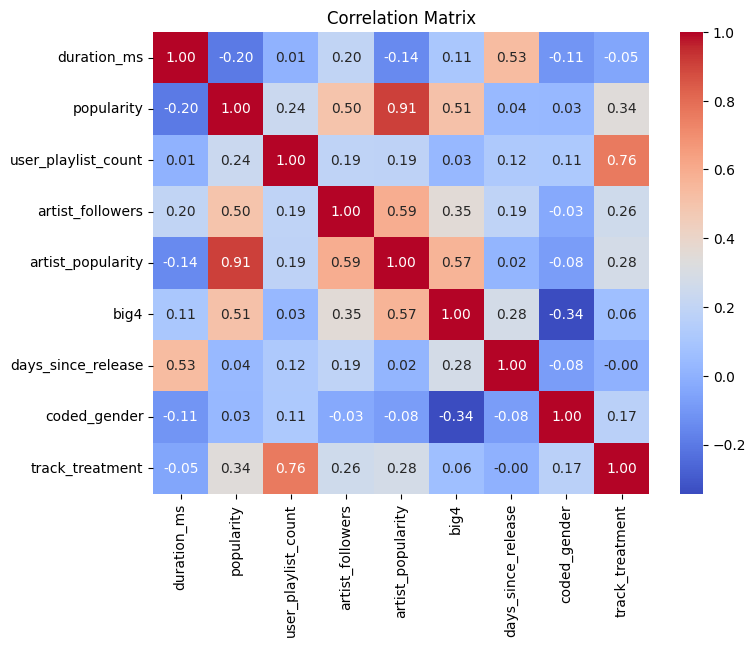

In [136]:
#quick visual
correlation_matrix = df[['duration_ms','popularity','user_playlist_count','artist_followers','artist_popularity','big4','days_since_release','coded_gender','track_treatment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [137]:
df=df.fillna(0)

In [141]:
df.head()

,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,big4,gender,user_playlist_count,which_user_playlists,track_treatment,days_since_release,coded_gender
0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,79,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1387,0
1,Dynamite,BTS,199053,BE,2020-11-20,81,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,1716,0
2,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,80,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,2633,0
3,Permission to Dance - Live,BTS,279286,PERMISSION TO DANCE ON STAGE - LIVE,2025-07-18,82,BTS,4UAnQaQTSMjKjHkqjKwEYx,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,0,,0,15,0
4,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,79,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,80103753,90,k-pop,Big Hit Music,1,M,1,5YZ5U9DAUd71CIwj55A49D,1,2304,0


In [142]:
df.groupby('gender')['track_treatment'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,139.0,0.179856,0.385457,0.0,0.0,0.0,0.0,1.0
M,130.0,0.069231,0.254828,0.0,0.0,0.0,0.0,1.0


In [143]:
df.groupby('track_treatment').describe()

duration_ms                                                \
                      count           mean       min        25%       50%   
track_treatment                                                             
0                     235.0  186892.195745  108986.0  169714.50  187226.0   
1                      34.0  183325.323529  138108.0  167944.75  184714.0   

                                                  release_date  \
                      75%       max           std        count   
track_treatment                                                  
0                201769.0  314866.0  26194.988964          235   
1                193744.0  240793.0  22508.071254           34   

                                                ... days_since_release  \
                                          mean  ...                max   
track_treatment                                 ...                      
0                2022-11-07 13:53:21.702127616  ...             6183.0   
1                2022-11-15 03:31:45.882352896  ...             3713.0   

                             coded_gender                                      \
                         std        count      mean  min   25%  50%  75%  max   
track_treatment                                                                 
0                1197.966427        235.0  0.485106  0.0  0.00  0.0  1.0  1.0   
1                1041.287261         34.0  0.735294  0.0  0.25  1.0  1.0  1.0   

                           
                      std  
track_treatment            
0                0.500845  
1                0.447811  

[2 rows x 72 columns]

In [144]:
df.to_csv('~/Desktop/full_kpop_data.csv')



### DAG

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


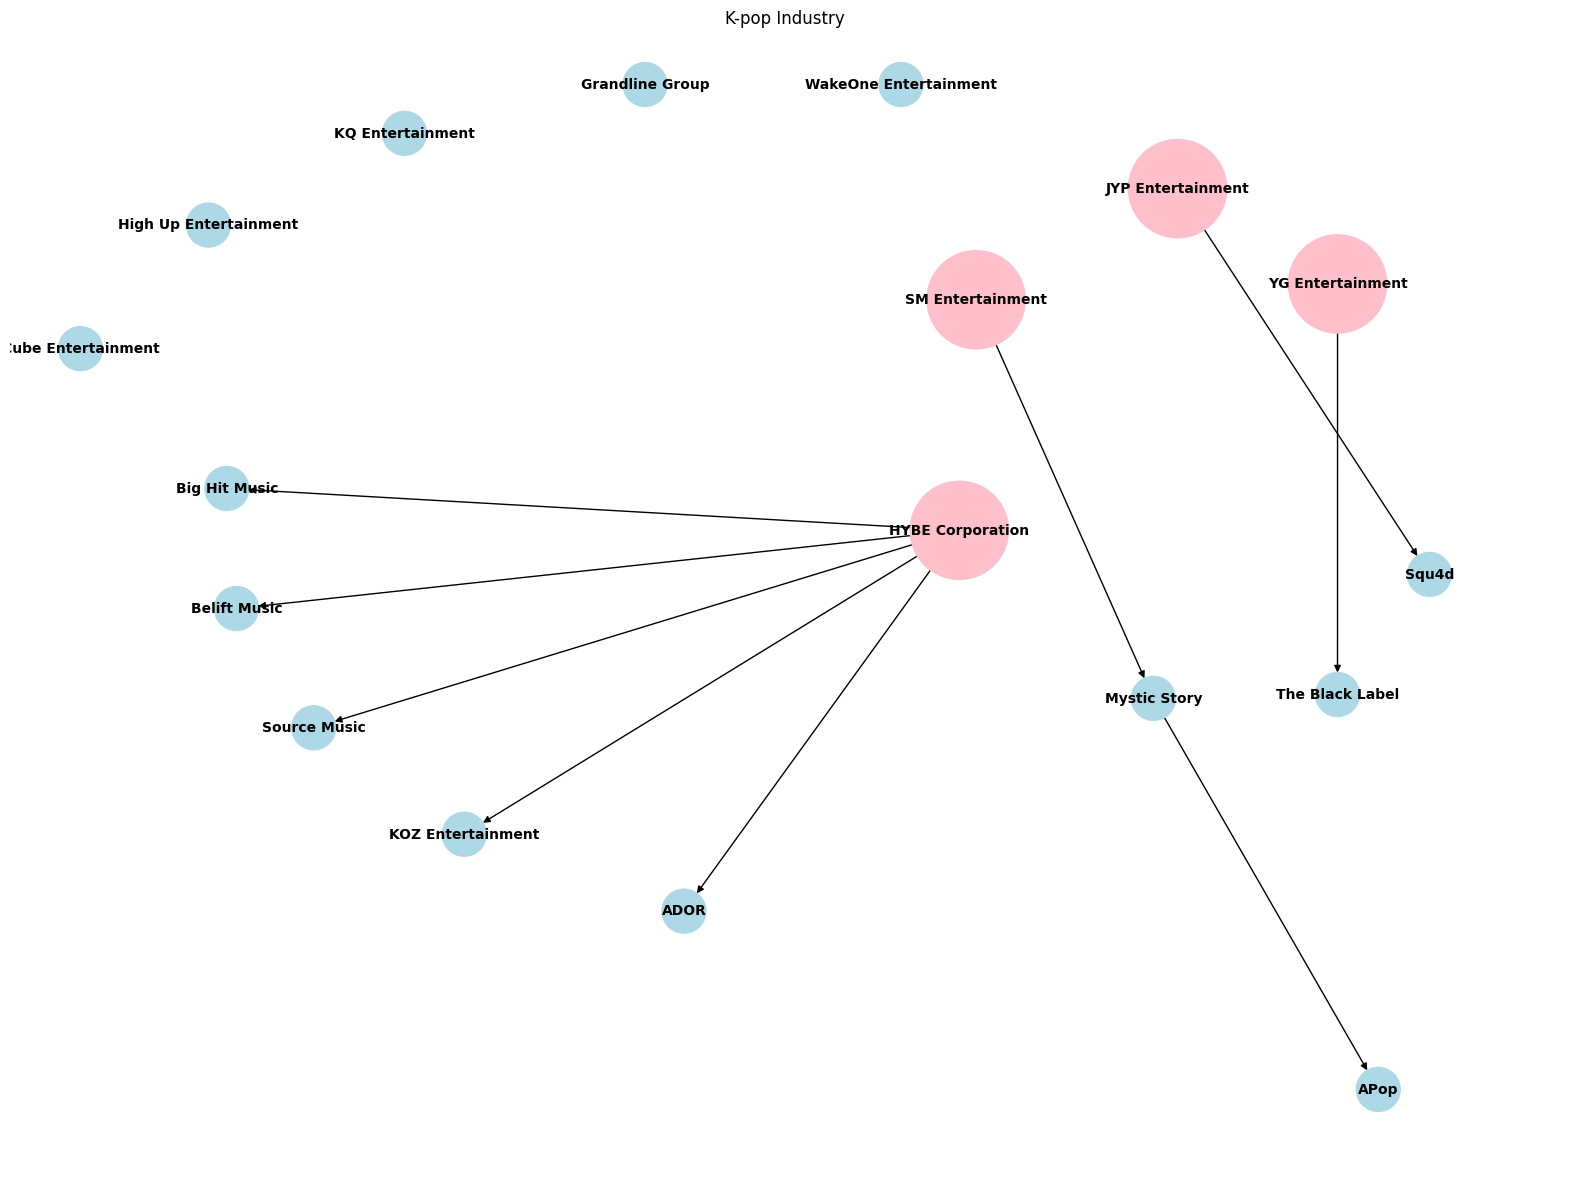

In [158]:
G = nx.DiGraph() 
G.add_nodes_from([
    "HYBE Corporation", "SM Entertainment", "YG Entertainment", "JYP Entertainment",
    "WakeOne Entertainment", "Grandline Group", "KQ Entertainment", "High Up Entertainment",
    "Cube Entertainment", "Big Hit Music", "Belift Music", "Source Music", "KOZ Entertainment",
    "ADOR", "Mystic Story", "APop", "The Black Label", "Squ4d"
])

# Add directed edges (dependencies)
G.add_edges_from([
    ("HYBE Corporation", "Big Hit Music"),
    ("HYBE Corporation", "Belift Music"),
    ("HYBE Corporation", "Source Music"),
    ("HYBE Corporation", "KOZ Entertainment"),
    ("HYBE Corporation", "ADOR"),
    ("SM Entertainment","Mystic Story"),
    ("Mystic Story","APop"),
    ("YG Entertainment","The Black Label"),
    ("JYP Entertainment","Squ4d")])

    # Define larger nodes
large_nodes = {"HYBE Corporation", "SM Entertainment", "YG Entertainment", "JYP Entertainment"}

# Set node sizes: larger for key labels, smaller for others
node_sizes = [5000 if node in large_nodes else 1000 for node in G.nodes()]
color=['pink' if node in large_nodes else 'lightblue' for node in G.nodes()]

# Visualize the DAG (optional)
plt.figure(figsize=(20, 15))
pos = nx.kamada_kawai_layout(G)  # You can choose different layouts
nx.draw_networkx(G, pos, with_labels=True,node_size=node_sizes, node_color=color, font_size=10, font_weight='bold', arrows=True)
plt.title("K-pop Industry")
plt.axis('off') # Hide axes
plt.show()


# Analysis:

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("~/Desktop/full_kpop_data.csv")
df.head()

,Unnamed: 0,track_name,artist,duration_ms,album,release_date,popularity,associated_kpop_group,spotify_track_id,artist_id,artist_followers,artist_popularity,artist_genres,company,gender,user_playlist_count,which_user_playlists,track_treatment
0,0,My Universe,Coldplay,226198,Music Of The Spheres,2021-10-15,80,BTS,46HNZY1i7O6jwTA7Slo2PI,3Nrfpe0tUJi4K4DXYWgMUX,79959030,90,k-pop,Big Hit Music,M,0,NaN,0
1,1,FAKE LOVE,BTS,242333,Love Yourself 轉 'Tear',2018-05-18,82,BTS,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,79959030,90,k-pop,Big Hit Music,M,0,NaN,0
2,2,Dynamite,BTS,199053,BE,2020-11-20,83,BTS,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,79959030,90,k-pop,Big Hit Music,M,0,NaN,0
3,3,Boy With Luv (feat. Halsey),BTS,229773,MAP OF THE SOUL : PERSONA,2019-04-12,80,BTS,4a9tbd947vo9K8Vti9JwcI,3Nrfpe0tUJi4K4DXYWgMUX,79959030,90,k-pop,Big Hit Music,M,1,5YZ5U9DAUd71CIwj55A49D,1
4,4,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,154486,CHARLIE,2022-10-06,77,BTS,0mBP9X2gPCuapvpZ7TGDk3,6HaGTQPmzraVmaVxvz6EUc,18014259,84,k-pop,Big Hit Music,M,0,NaN,0


In [3]:
df.dtypes

Unnamed: 0                int64
track_name               object
artist                   object
duration_ms               int64
album                    object
release_date             object
popularity                int64
associated_kpop_group    object
spotify_track_id         object
artist_id                object
artist_followers          int64
artist_popularity         int64
artist_genres            object
company                  object
gender                   object
user_playlist_count       int64
which_user_playlists     object
track_treatment           int64
dtype: object

In [10]:
df['release_date']=pd.to_datetime(df['release_date'])
df=df.fillna(0)
del df['Unnamed: 0']

In [11]:
df.describe()

,duration_ms,release_date,popularity,artist_followers,artist_popularity,user_playlist_count,track_treatment
count,269.00000,269,269.000000,2.690000e+02,269.000000,269.000000,269.000000
mean,187102.05948,2022-09-28 08:28:33.011152384,65.810409,1.076491e+07,71.345725,0.249071,0.122677
min,108986.00000,2008-08-28 00:00:00,35.000000,1.578830e+05,48.000000,0.000000,0.000000
25%,168437.00000,2021-11-10 00:00:00,59.000000,1.720153e+06,65.000000,0.000000,0.000000
50%,187310.00000,2023-08-30 00:00:00,68.000000,7.402025e+06,72.000000,0.000000,0.000000
75%,201880.00000,2024-11-08 00:00:00,75.000000,1.100024e+07,80.000000,0.000000,0.000000
max,314866.00000,2025-07-14 00:00:00,95.000000,7.995903e+07,90.000000,8.000000,1.000000
std,25667.48930,NaN,11.765008,1.650934e+07,11.629358,0.864543,0.328677


In [6]:
TREATMENT='track_treatment'
OUTCOME='popularity'
df.groupby('track_treatment')[OUTCOME].describe()

,count,mean,std,min,25%,50%,75%,max
track_treatment,,,,,,,,
0,236.0,64.394068,11.608939,35.0,57.0,66.0,73.0,83.0
1,33.0,75.939394,6.995264,61.0,72.0,77.0,80.0,95.0


In [ ]:
# release age
#big 4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from causalinference import CausalModel

SyntaxError: invalid syntax (3197552811.py, line 5)